In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv2
import numpy as np
from matplotlib import pyplot as plt

# template matchining

In [3]:
img = cv2.imread('/content/drive/MyDrive/Computer vision/lab08/img/p1.png')

In [4]:
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

In [5]:
img_rgb1 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

In [6]:
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

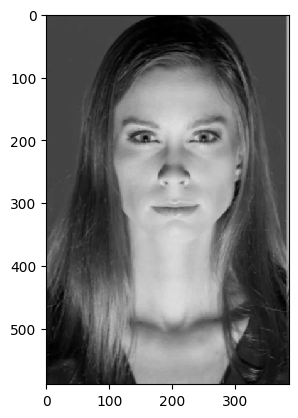

In [7]:
plt.imshow(img_gray, cmap='gray', vmin = 0, vmax = 255,interpolation='none');

In [8]:
img_tem = img_gray.copy()

In [9]:
img_tem = img_tem[70:381,100:321]

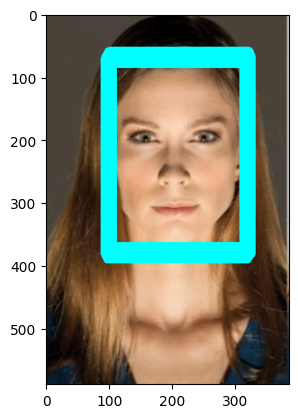

In [10]:
# Store width and height of template in w and h
w, h = img_tem.shape[::-1]

# Perform match operations.
res = cv2.matchTemplate(img_gray, img_tem, cv2.TM_CCOEFF_NORMED)

# Specify a threshold
threshold = 0.8

# Store the coordinates of matched area in a numpy array
loc = np.where(res >= threshold)

# Draw a rectangle around the matched region.
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0, 255, 255), 1)

# Show the final image with the matched area.
plt.imshow(img_rgb)

In [11]:
img2 = cv2.imread('/content/drive/MyDrive/Computer vision/lab08/img/p2.png')
img2_rgb = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
img2_rgb1 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

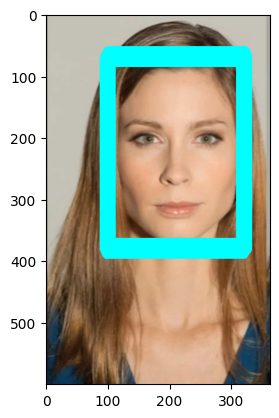

In [12]:
# Draw a rectangle around the matched region.
for pt in zip(*loc[::-1]):
    cv2.rectangle(img2_rgb, pt, (pt[0] + w, pt[1] + h), (0, 255, 255), 1)

# Show the final image with the matched area.
plt.imshow(img2_rgb)

In [13]:
img3 = cv2.imread('/content/drive/MyDrive/Computer vision/lab08/img/p3.png')
img3_rgb = cv2.cvtColor(img3,cv2.COLOR_BGR2RGB)
img3_rgb1 = cv2.cvtColor(img3,cv2.COLOR_BGR2RGB)

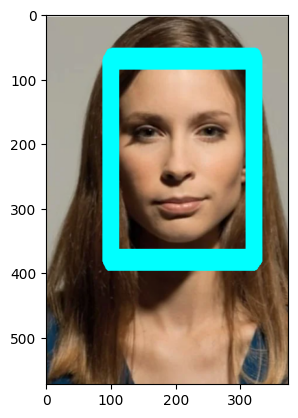

In [14]:
# Draw a rectangle around the matched region.
for pt in zip(*loc[::-1]):
    cv2.rectangle(img3_rgb, pt, (pt[0] + w, pt[1] + h), (0, 255, 255), 1)

# Show the final image with the matched area.
plt.imshow(img3_rgb)

In [15]:
fam = cv2.imread('/content/drive/MyDrive/Computer vision/lab08/img/family_1.jpg')
fam_rgb = cv2.cvtColor(fam,cv2.COLOR_BGR2RGB)
fam_rgb1 = cv2.cvtColor(fam,cv2.COLOR_BGR2RGB)

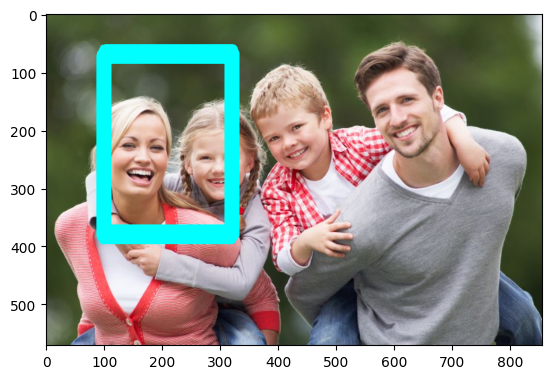

In [16]:
# Draw a rectangle around the matched region.
for pt in zip(*loc[::-1]):
    cv2.rectangle(fam_rgb, pt, (pt[0] + w, pt[1] + h), (0, 255, 255), 1)

# Show the final image with the matched area.
plt.imshow(fam_rgb)

In [17]:
car = cv2.imread('/content/drive/MyDrive/Computer vision/lab08/img/car.webp')
car_rgb = cv2.cvtColor(car,cv2.COLOR_BGR2RGB)
car_gray = cv2.cvtColor(car,cv2.COLOR_BGR2GRAY)

In [18]:
car_tem = car_gray.copy()

In [19]:
car_tem = car_tem[50:261,60:401]

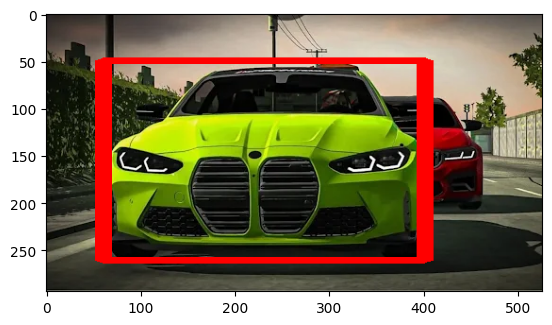

In [20]:
# Store width and height of template in w and h
w, h = car_tem.shape[::-1]

# Perform match operations.
car_res = cv2.matchTemplate(car_gray, car_tem, cv2.TM_CCOEFF_NORMED)

# Specify a threshold
threshold = 0.8

# Store the coordinates of matched area in a numpy array
loc = np.where(car_res >= threshold)

# Draw a rectangle around the matched region.
for pt in zip(*loc[::-1]):
    cv2.rectangle(car_rgb, pt, (pt[0] + w, pt[1] + h), (255, 0, 0), 1)

# Show the final image with the matched area.
plt.imshow(car_rgb);

# HoG Detect

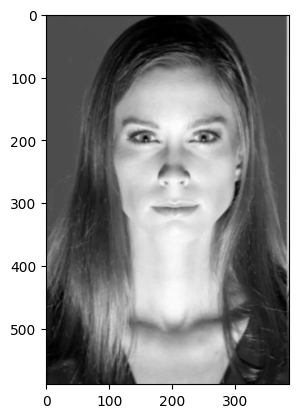

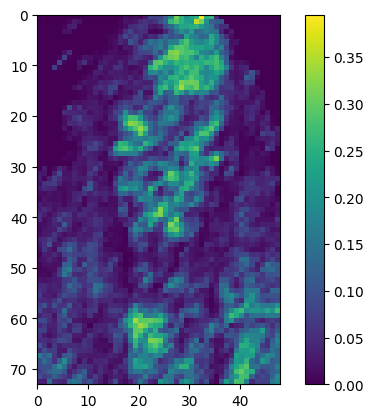

In [21]:
cell_size = (8, 8)  # h x w in pixels
block_size = (2, 2)  # h x w in cells
nbins = 9  # number of orientation bins

# winSize is the size of the image cropped to an multiple of the cell size
hog = cv2.HOGDescriptor(_winSize=(img_gray.shape[1] // cell_size[1] * cell_size[1],
                                  img_gray.shape[0] // cell_size[0] * cell_size[0]),
                        _blockSize=(block_size[1] * cell_size[1],
                                    block_size[0] * cell_size[0]),
                        _blockStride=(cell_size[1], cell_size[0]),
                        _cellSize=(cell_size[1], cell_size[0]),
                        _nbins=nbins)

n_cells = (img_gray.shape[0] // cell_size[0], img_gray.shape[1] // cell_size[1])
hog_feats = hog.compute(img_gray)\
               .reshape(n_cells[1] - block_size[1] + 1,
                        n_cells[0] - block_size[0] + 1,
                        block_size[0], block_size[1], nbins) \
               .transpose((1, 0, 2, 3, 4))  # index blocks by rows first
# hog_feats now contains the gradient amplitudes for each direction,
# for each cell of its group for each group. Indexing is by rows then columns.

gradients = np.zeros((n_cells[0], n_cells[1], nbins))

# count cells (border cells appear less often across overlapping groups)
cell_count = np.full((n_cells[0], n_cells[1], 1), 0, dtype=int)

for off_y in range(block_size[0]):
    for off_x in range(block_size[1]):
        gradients[off_y:n_cells[0] - block_size[0] + off_y + 1,
                  off_x:n_cells[1] - block_size[1] + off_x + 1] += \
            hog_feats[:, :, off_y, off_x, :]
        cell_count[off_y:n_cells[0] - block_size[0] + off_y + 1,
                   off_x:n_cells[1] - block_size[1] + off_x + 1] += 1

# Average gradients
gradients /= cell_count

# Preview
plt.figure()
plt.imshow(img_gray, cmap='gray')
plt.show()

bin = 5  # angle is 360 / nbins * direction
plt.pcolor(gradients[:, :, bin])
plt.gca().invert_yaxis()
plt.gca().set_aspect('equal', adjustable='box')
plt.colorbar()
plt.show()

(512, 256)


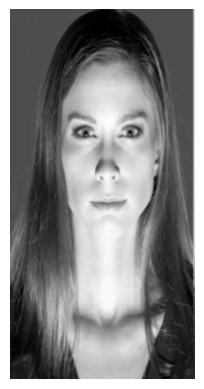

In [22]:
from skimage.transform import resize

# resizing image
resized_img = resize(img_gray, (128*4, 64*4))
plt.axis("off")
plt.imshow(resized_img,cmap='gray')
print(resized_img.shape)

In [37]:
!pip install opencv-python

In [38]:
?cv2.HOGDescriptor_getDefaultPeopleDetector()

Object `cv2.HOGDescriptor_getDefaultPeopleDetector()` not found.


< cv2.HOGDescriptor 0x7a3bbce21650>
()


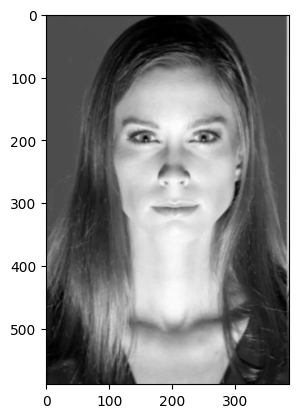

In [34]:
print(cv2.HOGDescriptor())
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

# Detect people in the image
locations, confidence = hog.detectMultiScale(img_gray)
print(locations)
# Draw rectangles around the detected people
for (x, y, w, h) in locations:
    cv2.rectangle(img_gray, (x, y), (x + w, y + h), (0, 0, 255), 5)

# Display the result
plt.imshow(img_gray,cmap='gray')

In [ ]:
# Draw bounding boxes around the detected objects
for (x, y, w, h) in detections:
    cv2.rectangle(img2_rgb1, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the result
plt.imshow(img2_rgb1)

In [ ]:
# Draw bounding boxes around the detected objects
for (x, y, w, h) in detections:
    cv2.rectangle(img3_rgb1, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the result
plt.imshow(img3_rgb1)